# Project Objective

Exploring Hacker News Posts
In this project we're specifically interested in posts whose titles begin with either Ask HN or Show HN. 

* Users submit Ask HN posts to ask the Hacker News community a specific question.
* Users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting. 

We will analyze which type of post and time receive the most comments on average i.e we need to advise on best hour to maximize the amount of comments a post receives

Our aim is to compare these two types of posts to determine the following:

1. Do Ask HN or Show HN receive more comments on average?
2. Do posts created at a certain time receive more comments on average?

# Importing Libraries

In [39]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Importing Dataset

In [40]:
hn = pd.read_csv("hacker_news.csv")
hn.head(3)

,id,title,url,num_points,num_comments,author id,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,08/04/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01


# Getting Summary

In [41]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20084 entries, 0 to 20083
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20084 non-null  int64 
 1   title         20084 non-null  object
 2   url           17644 non-null  object
 3   num_points    20084 non-null  int64 
 4   num_comments  20084 non-null  int64 
 5   author    id  20084 non-null  object
 6   created_at    20084 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [42]:
# Converting last column type to Datetime
# format = "%m/%d/%Y %H:%M"

pd.to_datetime(hn["created_at"] , format = "%m/%d/%Y %H:%M")

hn["created_at"] = pd.to_datetime(hn["created_at"] , format = "%m/%d/%Y %H:%M")
hn["created_at"]

0       2016-08-04 11:52:00
1       2016-06-23 22:20:00
2       2016-06-17 00:01:00
3       2015-09-30 04:12:00
4       2015-10-31 09:48:00
                ...        
20079   2016-08-29 02:22:00
20080   2015-10-06 14:57:00
20081   2016-01-02 00:49:00
20082   2015-12-15 19:32:00
20083   2016-05-12 01:43:00
Name: created_at, Length: 20084, dtype: datetime64[ns]

# Rechecking Type

In [43]:
hn.dtypes

id                       int64
title                   object
url                     object
num_points               int64
num_comments             int64
author    id            object
created_at      datetime64[ns]
dtype: object

# Creating A New Column "Title Category"

In [44]:
hn.insert(2, "Title Category", "Other")

In [45]:
hn

,id,title,Title Category,url,num_points,num_comments,author id,created_at
0,12224879,Interactive Dynamic Video,Other,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,2016-08-04 11:52:00
1,11964716,Florida DJs May Face Felony for April Fools' W...,Other,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,2016-06-23 22:20:00
2,11919867,Technology ventures: From Idea to Enterprise,Other,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,2016-06-17 00:01:00
3,10301696,Note by Note: The Making of Steinway L1037 (2007),Other,http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,2015-09-30 04:12:00
4,10482257,Title II kills investment? Comcast and other I...,Other,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,2015-10-31 09:48:00
...,...,...,...,...,...,...,...,...
20079,12379592,How Purism Avoids Intels Active Management Tec...,Other,https://puri.sm/philosophy/how-purism-avoids-i...,10,6,AdmiralAsshat,2016-08-29 02:22:00
20080,10339284,YC Application Translated and Broken Down,Other,https://medium.com/@zreitano/the-yc-applicatio...,4,1,zreitano,2015-10-06 14:57:00
20081,10824382,Microkernels are slow and Elvis didn't do no d...,Other,http://blog.darknedgy.net/technology/2016/01/0...,169,132,vezzy-fnord,2016-01-02 00:49:00
20082,10739875,How Product Hunt really works,Other,https://medium.com/@benjiwheeler/how-product-h...,695,222,brw12,2015-12-15 19:32:00


# Now Separating Ask HN & Show HN Posts

In [46]:
"Ask HN" in "I am posting project on Ask HN"

True

In [47]:
"Ask HN" in "Ask HN: I am posting project"

True

In [48]:
#now what if i want to see those posts that start with ask hn not end but in gives true for both use starts with also endswith

"I am posting project on Ask HN".startswith("Ask HN")

False

In [49]:
"Ask HN: I am posting project".startswith("Ask HN")

True

# Ask HN

In [50]:
hn['title'] = hn["title"].str.upper()
hn["title"]

0                                INTERACTIVE DYNAMIC VIDEO
1        FLORIDA DJS MAY FACE FELONY FOR APRIL FOOLS' W...
2             TECHNOLOGY VENTURES: FROM IDEA TO ENTERPRISE
3        NOTE BY NOTE: THE MAKING OF STEINWAY L1037 (2007)
4        TITLE II KILLS INVESTMENT? COMCAST AND OTHER I...
                               ...                        
20079    HOW PURISM AVOIDS INTELS ACTIVE MANAGEMENT TEC...
20080            YC APPLICATION TRANSLATED AND BROKEN DOWN
20081    MICROKERNELS ARE SLOW AND ELVIS DIDN'T DO NO D...
20082                        HOW PRODUCT HUNT REALLY WORKS
20083    ROBOBROWSER: YOUR FRIENDLY NEIGHBORHOOD WEB SC...
Name: title, Length: 20084, dtype: object

In [51]:
ask_hn = hn[hn["title"].str.startswith("ASK HN")]
ask_hn

,id,title,Title Category,url,num_points,num_comments,author id,created_at
6,12296411,ASK HN: HOW TO IMPROVE MY PERSONAL WEBSITE?,Other,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00
16,10610020,ASK HN: AM I THE ONLY ONE OUTRAGED BY TWITTER ...,Other,NaN,28,29,tkfx,2015-11-22 13:43:00
21,11610310,ASK HN: ABY RECENT CHANGES TO CSS THAT BROKE M...,Other,NaN,1,1,polskibus,2016-05-02 10:14:00
29,12210105,ASK HN: LOOKING FOR EMPLOYEE #3 HOW DO I DO IT?,Other,NaN,1,3,sph130,2016-08-02 14:20:00
30,10394168,ASK HN: SOMEONE OFFERED TO BUY MY BROWSER EXTE...,Other,NaN,28,17,roykolak,2015-10-15 16:38:00
...,...,...,...,...,...,...,...,...
20023,10994357,ASK HN: IS IT FEASIBLE TO PORT APPLE'S SWIFT T...,Other,NaN,3,17,schappim,2016-01-29 09:42:00
20026,12241954,ASK HN: WHAT TO DO WHEN A DEVELOPER GOES DARK?,Other,NaN,3,3,bittysdad,2016-08-07 12:58:00
20029,12029526,ASK HN: KILLER APP FOR AR?,Other,NaN,2,2,davidiach,2016-07-04 08:50:00
20032,11227969,ASK HN: HOW DO YOU BALANCE A SERIOUS RELATIONS...,Other,NaN,10,4,audace,2016-03-05 01:25:00


# Separating Indices of Ask HN Posts

In [52]:
ask_hn.index

Int64Index([    6,    16,    21,    29,    30,    48,    50,    64,    69,
              117,
            ...
            19980, 19985, 19992, 19993, 20019, 20023, 20026, 20029, 20032,
            20045],
           dtype='int64', length=1744)

In [53]:
hn.loc[ask_hn.index,"Title Category"] = "ASK HN"

In [54]:
hn.head(10)

,id,title,Title Category,url,num_points,num_comments,author id,created_at
0,12224879,INTERACTIVE DYNAMIC VIDEO,Other,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,2016-08-04 11:52:00
1,11964716,FLORIDA DJS MAY FACE FELONY FOR APRIL FOOLS' W...,Other,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,2016-06-23 22:20:00
2,11919867,TECHNOLOGY VENTURES: FROM IDEA TO ENTERPRISE,Other,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,2016-06-17 00:01:00
3,10301696,NOTE BY NOTE: THE MAKING OF STEINWAY L1037 (2007),Other,http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,2015-09-30 04:12:00
4,10482257,TITLE II KILLS INVESTMENT? COMCAST AND OTHER I...,Other,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,2015-10-31 09:48:00
5,10557283,NUTS AND BOLTS BUSINESS ADVICE,Other,NaN,3,4,shomberj,2015-11-13 00:45:00
6,12296411,ASK HN: HOW TO IMPROVE MY PERSONAL WEBSITE?,ASK HN,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00
7,11337617,"SHIMS, JIGS AND OTHER WOODWORKING CONCEPTS TO ...",Other,http://firstround.com/review/shims-jigs-and-ot...,34,7,zt,2016-03-22 16:18:00
8,10379326,THAT SELF-APPENDECTOMY,Other,http://www.southpolestation.com/trivia/igy1/ap...,91,10,jimsojim,2015-10-13 09:30:00
9,11370829,CRATE RAISES $4M SEED ROUND FOR ITS NEXT-GEN S...,Other,http://techcrunch.com/2016/03/15/crate-raises-...,3,1,hitekker,2016-03-27 18:08:00


In [55]:
show_hn = hn[hn["title"].str.startswith("SHOW HN")]
show_hn

,id,title,Title Category,url,num_points,num_comments,author id,created_at
12,10627194,SHOW HN: WIO LINK ESP8266 BASED WEB OF THINGS...,Other,https://iot.seeed.cc,26,22,kfihihc,2015-11-25 14:03:00
38,10646440,SHOW HN: SOMETHING POINTLESS I MADE,Other,http://dn.ht/picklecat/,747,102,dhotson,2015-11-29 22:46:00
45,11590768,"SHOW HN: SHANHU.IO, A PROGRAMMING PLAYGROUND P...",Other,https://shanhu.io,1,1,h8liu,2016-04-28 18:05:00
83,12178806,SHOW HN: WEBSCOPE EASY WAY FOR WEB DEVELOPERS...,Other,http://webscopeapp.com,3,3,fastbrick,2016-07-28 07:11:00
96,10872799,SHOW HN: GEOSCREENSHOT EASILY TEST GEO-IP BAS...,Other,https://www.geoscreenshot.com/,1,9,kpsychwave,2016-01-09 20:45:00
...,...,...,...,...,...,...,...,...
19977,11222099,SHOW HN: GEOCODING API BUILT WITH GOVERNMENT O...,Other,https://latlon.io,6,6,evanmarks,2016-03-04 04:50:00
19983,11735438,SHOW HN: DECORATING: ANIMATED PULSED FOR YOUR ...,Other,https://github.com/ryukinix/decorating,3,1,lerax,2016-05-20 03:48:00
19998,10200913,SHOW HN: IDEA TO STARTUP,Other,https://ideatostartup.org,14,17,nikhildaga,2015-09-10 22:17:00
20049,11444393,"SHOW HN: PHANTOMJSCLOUD, HEADLESS BROWSER SAAS",Other,https://PhantomJsCloud.com,2,1,novaleaf,2016-04-07 03:04:00


In [56]:
show_hn.index

Int64Index([   12,    38,    45,    83,    96,   113,   119,   124,   126,
              128,
            ...
            19921, 19930, 19950, 19951, 19974, 19977, 19983, 19998, 20049,
            20054],
           dtype='int64', length=1162)

In [57]:
hn.loc[show_hn.index,"Title Category"] = "SHOW HN"

In [58]:
hn.head(15)

,id,title,Title Category,url,num_points,num_comments,author id,created_at
0,12224879,INTERACTIVE DYNAMIC VIDEO,Other,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,2016-08-04 11:52:00
1,11964716,FLORIDA DJS MAY FACE FELONY FOR APRIL FOOLS' W...,Other,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,2016-06-23 22:20:00
2,11919867,TECHNOLOGY VENTURES: FROM IDEA TO ENTERPRISE,Other,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,2016-06-17 00:01:00
3,10301696,NOTE BY NOTE: THE MAKING OF STEINWAY L1037 (2007),Other,http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,2015-09-30 04:12:00
4,10482257,TITLE II KILLS INVESTMENT? COMCAST AND OTHER I...,Other,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,2015-10-31 09:48:00
5,10557283,NUTS AND BOLTS BUSINESS ADVICE,Other,NaN,3,4,shomberj,2015-11-13 00:45:00
6,12296411,ASK HN: HOW TO IMPROVE MY PERSONAL WEBSITE?,ASK HN,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00
7,11337617,"SHIMS, JIGS AND OTHER WOODWORKING CONCEPTS TO ...",Other,http://firstround.com/review/shims-jigs-and-ot...,34,7,zt,2016-03-22 16:18:00
8,10379326,THAT SELF-APPENDECTOMY,Other,http://www.southpolestation.com/trivia/igy1/ap...,91,10,jimsojim,2015-10-13 09:30:00
9,11370829,CRATE RAISES $4M SEED ROUND FOR ITS NEXT-GEN S...,Other,http://techcrunch.com/2016/03/15/crate-raises-...,3,1,hitekker,2016-03-27 18:08:00


# Filtering Out the Data for Ask HN & Show HN Rows Only

In [59]:
hn = hn[hn["Title Category"].isin(["ASK HN","SHOW HN"])]
hn

,id,title,Title Category,url,num_points,num_comments,author id,created_at
6,12296411,ASK HN: HOW TO IMPROVE MY PERSONAL WEBSITE?,ASK HN,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00
12,10627194,SHOW HN: WIO LINK ESP8266 BASED WEB OF THINGS...,SHOW HN,https://iot.seeed.cc,26,22,kfihihc,2015-11-25 14:03:00
16,10610020,ASK HN: AM I THE ONLY ONE OUTRAGED BY TWITTER ...,ASK HN,NaN,28,29,tkfx,2015-11-22 13:43:00
21,11610310,ASK HN: ABY RECENT CHANGES TO CSS THAT BROKE M...,ASK HN,NaN,1,1,polskibus,2016-05-02 10:14:00
29,12210105,ASK HN: LOOKING FOR EMPLOYEE #3 HOW DO I DO IT?,ASK HN,NaN,1,3,sph130,2016-08-02 14:20:00
...,...,...,...,...,...,...,...,...
20029,12029526,ASK HN: KILLER APP FOR AR?,ASK HN,NaN,2,2,davidiach,2016-07-04 08:50:00
20032,11227969,ASK HN: HOW DO YOU BALANCE A SERIOUS RELATIONS...,ASK HN,NaN,10,4,audace,2016-03-05 01:25:00
20045,11743946,ASK HN: WHY ARE PAPERS STILL PUBLISHED AS PDFS?,ASK HN,NaN,4,2,adius,2016-05-21 09:22:00
20049,11444393,"SHOW HN: PHANTOMJSCLOUD, HEADLESS BROWSER SAAS",SHOW HN,https://PhantomJsCloud.com,2,1,novaleaf,2016-04-07 03:04:00


# Resetting Indices

In [60]:
hn.reset_index(drop = True,inplace = True) #if false then extra column
hn

,id,title,Title Category,url,num_points,num_comments,author id,created_at
0,12296411,ASK HN: HOW TO IMPROVE MY PERSONAL WEBSITE?,ASK HN,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00
1,10627194,SHOW HN: WIO LINK ESP8266 BASED WEB OF THINGS...,SHOW HN,https://iot.seeed.cc,26,22,kfihihc,2015-11-25 14:03:00
2,10610020,ASK HN: AM I THE ONLY ONE OUTRAGED BY TWITTER ...,ASK HN,NaN,28,29,tkfx,2015-11-22 13:43:00
3,11610310,ASK HN: ABY RECENT CHANGES TO CSS THAT BROKE M...,ASK HN,NaN,1,1,polskibus,2016-05-02 10:14:00
4,12210105,ASK HN: LOOKING FOR EMPLOYEE #3 HOW DO I DO IT?,ASK HN,NaN,1,3,sph130,2016-08-02 14:20:00
...,...,...,...,...,...,...,...,...
2901,12029526,ASK HN: KILLER APP FOR AR?,ASK HN,NaN,2,2,davidiach,2016-07-04 08:50:00
2902,11227969,ASK HN: HOW DO YOU BALANCE A SERIOUS RELATIONS...,ASK HN,NaN,10,4,audace,2016-03-05 01:25:00
2903,11743946,ASK HN: WHY ARE PAPERS STILL PUBLISHED AS PDFS?,ASK HN,NaN,4,2,adius,2016-05-21 09:22:00
2904,11444393,"SHOW HN: PHANTOMJSCLOUD, HEADLESS BROWSER SAAS",SHOW HN,https://PhantomJsCloud.com,2,1,novaleaf,2016-04-07 03:04:00


# Generating Frequency Table For "Title Category" Column

In [61]:
freq = hn["Title Category"].value_counts()
freq

ASK HN     1744
SHOW HN    1162
Name: Title Category, dtype: int64

# Visualizing Frequency Table

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

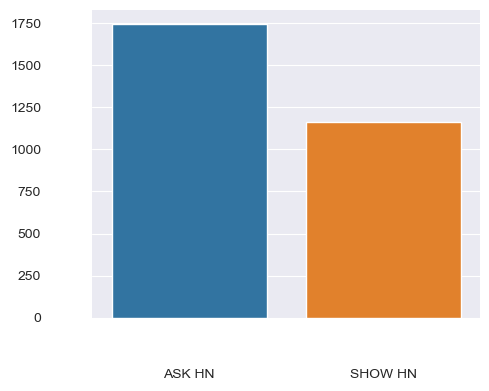

In [63]:
plt.figure(figsize = (5,4))
sns.barplot(data = hn, x = ["ASK HN","SHOW HN"], y = [1744,1162])
sns.despine(offset = 30, trim = True)
plt.show()

# Aim 01 : 

> Most Number Of Comments On Avg (Ask or Show ?)

In [64]:
hn.pivot_table(index = "Title Category", values = "num_comments", aggfunc = "mean")

,num_comments
Title Category,
ASK HN,14.038417
SHOW HN,10.316695


# Aim 02: 

> Now we will find average comments again but now we will do it wrt hours.

> Target is to know when to ask something on website (so we can get good response).

> By knowing the time we can engage more people and target more human traffic

In [65]:
hn["created_at"].dt.hour
hours = hn["created_at"].dt.strftime("%I %p")
hours 

0       09 AM
1       02 PM
2       01 PM
3       10 AM
4       02 PM
        ...  
2901    08 AM
2902    01 AM
2903    09 AM
2904    03 AM
2905    11 AM
Name: created_at, Length: 2906, dtype: object

In [66]:
hn.loc[:,"Hour"] = hours

In [67]:
hn.Hour

0       09 AM
1       02 PM
2       01 PM
3       10 AM
4       02 PM
        ...  
2901    08 AM
2902    01 AM
2903    09 AM
2904    03 AM
2905    11 AM
Name: Hour, Length: 2906, dtype: object

In [68]:
hn

,id,title,Title Category,url,num_points,num_comments,author id,created_at,Hour
0,12296411,ASK HN: HOW TO IMPROVE MY PERSONAL WEBSITE?,ASK HN,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00,09 AM
1,10627194,SHOW HN: WIO LINK ESP8266 BASED WEB OF THINGS...,SHOW HN,https://iot.seeed.cc,26,22,kfihihc,2015-11-25 14:03:00,02 PM
2,10610020,ASK HN: AM I THE ONLY ONE OUTRAGED BY TWITTER ...,ASK HN,NaN,28,29,tkfx,2015-11-22 13:43:00,01 PM
3,11610310,ASK HN: ABY RECENT CHANGES TO CSS THAT BROKE M...,ASK HN,NaN,1,1,polskibus,2016-05-02 10:14:00,10 AM
4,12210105,ASK HN: LOOKING FOR EMPLOYEE #3 HOW DO I DO IT?,ASK HN,NaN,1,3,sph130,2016-08-02 14:20:00,02 PM
...,...,...,...,...,...,...,...,...,...
2901,12029526,ASK HN: KILLER APP FOR AR?,ASK HN,NaN,2,2,davidiach,2016-07-04 08:50:00,08 AM
2902,11227969,ASK HN: HOW DO YOU BALANCE A SERIOUS RELATIONS...,ASK HN,NaN,10,4,audace,2016-03-05 01:25:00,01 AM
2903,11743946,ASK HN: WHY ARE PAPERS STILL PUBLISHED AS PDFS?,ASK HN,NaN,4,2,adius,2016-05-21 09:22:00,09 AM
2904,11444393,"SHOW HN: PHANTOMJSCLOUD, HEADLESS BROWSER SAAS",SHOW HN,https://PhantomJsCloud.com,2,1,novaleaf,2016-04-07 03:04:00,03 AM


# Method 01 :

In [69]:
hn.pivot_table(index = ["Title Category","Hour"], values = "num_comments", aggfunc = "mean")

num_comments
Title Category Hour               
ASK HN         01 AM     11.383333
               01 PM     14.741176
               02 AM     23.810345
               02 PM     13.233645
               03 AM      7.796296
               03 PM     38.594828
               04 AM      7.170213
               04 PM     16.796296
               05 AM     10.086957
               05 PM     11.460000
               06 AM      9.022727
               06 PM     13.201835
               07 AM      7.852941
               07 PM     10.800000
               08 AM     10.250000
               08 PM     21.525000
               09 AM      5.577778
               09 PM     16.009174
               10 AM     13.440678
               10 PM      6.746479
               11 AM     11.051724
               11 PM      7.985294
               12 AM      8.127273
               12 PM      9.410959
SHOW HN        01 AM      8.785714
               01 PM      9.555556
               02 AM      4.233333
               02 PM     13.441860
               03 AM     10.629630
               03 PM      8.102564
               04 AM      9.500000
               04 PM     11.655914
               05 AM      3.052632
               05 PM      9.795699
               06 AM      8.875000
               06 PM     15.770492
               07 AM     11.500000
               07 PM      9.800000
               08 AM      4.852941
               08 PM     10.200000
               09 AM      9.700000
               09 PM      5.787234
               10 AM      8.250000
               10 PM     12.391304
               11 AM     11.159091
               11 PM     12.416667
               12 AM     15.709677
               12 PM     11.803279

# Method 02 :

In [70]:
ask_hn = hn[hn["Title Category"] == "ASK HN"]
show_hn = hn[hn["Title Category"] == "SHOW HN"]

In [71]:
ask_hn = ask_hn.pivot_table(index = "Hour", values = "num_comments", aggfunc = "mean")

In [72]:
ask_hn

,num_comments
Hour,
01 AM,11.383333
01 PM,14.741176
02 AM,23.810345
02 PM,13.233645
03 AM,7.796296
03 PM,38.594828
04 AM,7.170213
04 PM,16.796296
05 AM,10.086957


In [73]:
ask_hn.sort_values(by="num_comments",ascending=False)

,num_comments
Hour,
03 PM,38.594828
02 AM,23.810345
08 PM,21.525000
04 PM,16.796296
09 PM,16.009174
01 PM,14.741176
10 AM,13.440678
02 PM,13.233645
06 PM,13.201835


In [74]:
show_hn = show_hn.pivot_table(index = "Hour", values = "num_comments", aggfunc = "mean")

In [75]:
show_hn.sort_values(by="num_comments",ascending=False)

,num_comments
Hour,
06 PM,15.770492
12 AM,15.709677
02 PM,13.441860
11 PM,12.416667
10 PM,12.391304
12 PM,11.803279
04 PM,11.655914
07 AM,11.500000
11 AM,11.159091


# Visualization of Aim 02

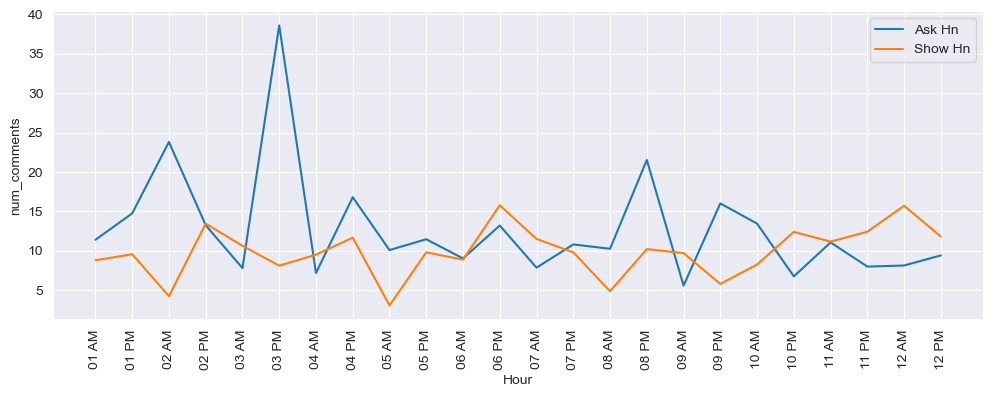

In [76]:
plt.figure( figsize = (12 , 4) )

sns.set_style("darkgrid")

sns.lineplot(data = ask_hn  , x = ask_hn.index  , y = "num_comments")
sns.lineplot(data = show_hn , x = show_hn.index , y = "num_comments")
          
plt.xticks(rotation = 90)
plt.legend(["Ask Hn","Show Hn"])
plt.show()

# Conclusion

- On average, "Ask HN" receives the most number of comments.
- The best hours to ask something on Hacker News are: 3 PM, 2 AM, and 8 PM.
- The best hours to share something on Hacker News are: 6 PM, 12 AM, and 2 PM.